In [1]:
import numpy as np
import matplotlib.pyplot as plt
import collections as coll 
import random
from time import time
from timeit import timeit
from scipy.interpolate import interp1d 
from scipy.optimize import curve_fit

## Initial growth model 

In [50]:
initial_time = time()# we use this library to calculate execution time   
#-------------------------------------------------------------------------------
#initial variables 
s=[]#this list is for save the replication times
celulas=[]# this list is for save the total number of cells 
zi=[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]# initial age distribution 
t=0 # total time   
R=0 # to count the replicative times 
tr=[]#list to save the total time in each iteration
m=19 # number to determine the generation in which the cells die 
muertes=0# variable to count the number of dead and non-viable cells 
fraccion=[]# list to save the fraction of viable cells 
r=0 # per capita growth
g=15 # number of generations that growth the population 
#------------------------------------------------------------------------------- 
for j in range(g): 
  zf=np.zeros(m,dtype=np.int64) # It has a defined length which is determined by the generation in which the cells die
  for i in range(m-1):  
    zf[i+1]= zi[i]
    zf[0]=sum(zi)-zi[-1]
  zi=zf 
#-------------------------------------------------------------------------------
  R=R+120 # 120 is the constant replicative time, in minutes, that we took 
  s.append(R)
  celulas.append(sum(zi)) 
#-------------------------------------------------------------------------------
  t=t+max(s)    # total time 
  tr.append(t)
#-------------------------------------------------------------------------------
#calculations 
  muertes=muertes+zf[-1]#list to save the dead cells
  total_celulas= sum(zi)+muertes # total cells, viable cells plus dead cells  
  fraccion_viables= (sum(zi)-zi[-1])/total_celulas #fraction of viable cells  
  fraccion.append(fraccion_viables)
  r=zi[0]-muertes 
#-------------------------------------------------------------------------------
  print('age distribution', zi)
  #print('s',s)
  #print('time',t) 
  #print('time list',tr) # 
  print('Non-viable cells', muertes) 
  #print('growth rate', r)#
  #print('viable cells ', total)
  #print('total of population ',total_celulas)
  #print('fraction of viable cells',fraccion_viables)
  #print('list of viable cells fraction', fraccion)
  print('---------------')
#-------------------------------------------------------------------------------
print(len(zi))
final_time = time()
execution_time = final_time - initial_time
#print('execution time',execution_time)

age distribution [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Non-viable cells 0
---------------
age distribution [2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Non-viable cells 0
---------------
age distribution [4 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Non-viable cells 0
---------------
age distribution [8 4 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Non-viable cells 0
---------------
age distribution [16  8  4  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
Non-viable cells 0
---------------
age distribution [32 16  8  4  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0]
Non-viable cells 0
---------------
age distribution [64 32 16  8  4  2  1  1  0  0  0  0  0  0  0  0  0  0  0]
Non-viable cells 0
---------------
age distribution [128  64  32  16   8   4   2   1   1   0   0   0   0   0   0   0   0   0
   0]
Non-viable cells 0
---------------
age distribution [256 128  64  32  16   8   4   2   1   1   0   0   0   0   0   0   0   0
   0]
Non-viable cells 0
---------------
age distribution [512 256 128  64  32

In [3]:
indice=[]#Ages 
ind=-1
for i in range(len(zi)):
  ind=ind+1
  indice.append(ind)
print(indice)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


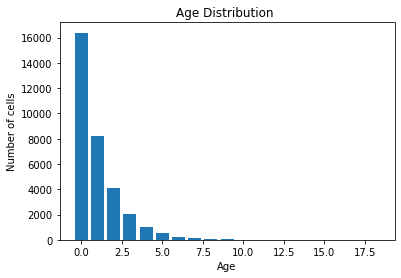

In [4]:
fig, ax = plt.subplots()
ax.set_ylabel('Number of cells')
ax.set_xlabel('Age')
ax.set_title('Age Distribution ')
plt.bar(indice, zi)
plt.show()

In [5]:
dic= dict(zip(zi,indice))# dictionary that store the age distribution {number of cells:age}
print(dic)

{16384: 0, 8192: 1, 4096: 2, 2048: 3, 1024: 4, 512: 5, 256: 6, 128: 7, 64: 8, 32: 9, 16: 10, 8: 11, 4: 12, 2: 13, 1: 15, 0: 18}


In [6]:
#probability 
P=[] # probability list 
for i in zi:
  p=i/total_celulas 
  P.append(p)
print(P)

[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625, 0.0001220703125, 6.103515625e-05, 3.0517578125e-05, 3.0517578125e-05, 0.0, 0.0, 0.0]


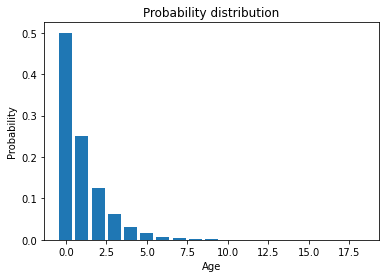

In [7]:
fig, ax = plt.subplots()   
ax.set_ylabel('Probability')
ax.set_xlabel('Age')
ax.set_title('Probability distribution')
plt.bar(indice, P)
plt.show()

In [8]:
#number of the first sample 
muestra=int((total_celulas*0.02)/5) #sample 
print(muestra)
print(total_celulas)

131
32768


In [9]:
#taking of the first sample 
sample= random.choices(indice,weights=P,k=muestra)   
print(sample)

[1, 0, 0, 0, 0, 0, 0, 6, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 1, 1, 1, 3, 0, 0, 6, 0, 0, 3, 2, 2, 3, 1, 0, 3, 1, 0, 1, 0, 0, 0, 0, 3, 2, 0, 0, 2, 1, 0, 0, 4, 0, 0, 0, 1, 1, 3, 0, 1, 2, 5, 1, 4, 0, 1, 2, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 4, 3, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 3, 8, 7, 0, 0, 2, 1, 2, 1, 0, 2, 0, 2, 4, 2, 1, 4, 1, 1, 2, 1]


In [10]:
#dictionary that stores the new age distribution for the sample {Age: number of cells}
print(coll.Counter(sample))

Counter({0: 65, 1: 28, 2: 17, 3: 9, 4: 7, 6: 2, 5: 1, 8: 1, 7: 1})




---



---



In [11]:
#To organize the dictionary
Dic= coll.Counter(sample)
Dics=sorted(Dic)
print(Dics)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [12]:
valores_ord = coll.OrderedDict(sorted(Dic.items()))
print(valores_ord)
print(valores_ord[0])

OrderedDict([(0, 65), (1, 28), (2, 17), (3, 9), (4, 7), (5, 1), (6, 2), (7, 1), (8, 1)])
65


In [13]:
#to split the number of cells and ages of the dictionary 
valores=valores_ord.values()
llaves=valores_ord.keys()
Ncell=[]
Edad=[]
for i in valores:
  Ncell.append(i)
print('Number of cells',Ncell)
for j in llaves:
  Edad.append(j)
print('Ages',Edad)
print(sum(Ncell))

Number of cells [65, 28, 17, 9, 7, 1, 2, 1, 1]
Ages [0, 1, 2, 3, 4, 5, 6, 7, 8]
131


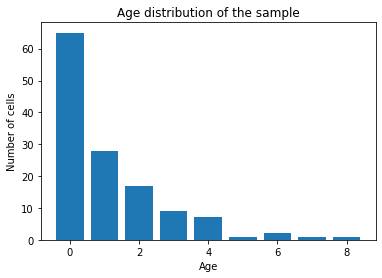

In [14]:
fig, ax = plt.subplots()   
ax.set_ylabel('Number of cells')
ax.set_xlabel('Age')
ax.set_title('Age distribution of the sample')
plt.bar(Edad, Ncell)
plt.show()

In [15]:
#to organize the dictionary in a list 
inicial1=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(Edad)):
  if i==Edad[i]:
    inicial1[i]=Ncell[i]
  else:
    inicial1[Edad[i]]=Ncell[i]
print(inicial1)
print(len(inicial1))

[65, 28, 17, 9, 7, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
25




---



---



## **Convolution**

We did the same simulation but this time we took the initial age distribution as the saple distribution that we got. 

In [16]:
tiempo_inicial = time()  
#-------------------------------------------------------------------------------
#initial variables 
s_1=[]
R_1=0
celulas_1=[]
t_1=0  
tr_1=[]
m_1=19   
muertes_1=0 
fraccion_1=[]
suma_1=[]
r_1=0 
g_1=10
#------------------------------------------------------------------------------- 

for j_1 in range(g_1):
  zf_1=np.zeros(m_1,dtype=np.int64) 
  for i_1 in range(m_1 -1): 
    zf_1[i_1+1]= inicial1[i_1]
    zf_1[0]=sum(inicial1)-inicial1[-1]
  inicial1=zf_1
#-------------------------------------------------------------------------------

  muertes_1=muertes_1+zf_1[-1]
  total_celulas_1= sum(inicial1)+muertes_1 
  fraccion_viables_1= (sum(inicial1)-inicial1[-1])/total_celulas_1
  fraccion.append(fraccion_viables_1)
  r_1=inicial1[0]-muertes_1 
#-------------------------------------------------------------------------------
  total_1=sum(inicial1)
  suma_1.append(total_1)
#-------------------------------------------------------------------------------
  print(inicial1)
  #print('s',s)
  #print('time',t)
  #print('time list',tr)
  print('Non-viable cells', muertes_1)
  #print('growth rate', r)
  #print('viable cells', total)
  #print('total of population',total_celulas)
  #print('fraction of viable cells',fraccion_viables)
  #print('list of viable cells fraction',fraccion)
  print('---------------')
#-------------------------------------------------------------------------------
print(len(inicial1))
tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial
print('tiempo de ejecucion',tiempo_ejecucion)

[131  65  28  17   9   7   1   2   1   1   0   0   0   0   0   0   0   0
   0]
Non-viable cells 0
---------------
[262 131  65  28  17   9   7   1   2   1   1   0   0   0   0   0   0   0
   0]
Non-viable cells 0
---------------
[524 262 131  65  28  17   9   7   1   2   1   1   0   0   0   0   0   0
   0]
Non-viable cells 0
---------------
[1048  524  262  131   65   28   17    9    7    1    2    1    1    0
    0    0    0    0    0]
Non-viable cells 0
---------------
[2096 1048  524  262  131   65   28   17    9    7    1    2    1    1
    0    0    0    0    0]
Non-viable cells 0
---------------
[4192 2096 1048  524  262  131   65   28   17    9    7    1    2    1
    1    0    0    0    0]
Non-viable cells 0
---------------
[8384 4192 2096 1048  524  262  131   65   28   17    9    7    1    2
    1    1    0    0    0]
Non-viable cells 0
---------------
[16768  8384  4192  2096  1048   524   262   131    65    28    17     9
     7     1     2     1     1     0     0]
Non-viabl

In [17]:
edad=[]#Ages
ind=-1
for i in range(len(inicial1)):
  ind=ind+1
  edad.append(ind)
print('Age',edad)

Age [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


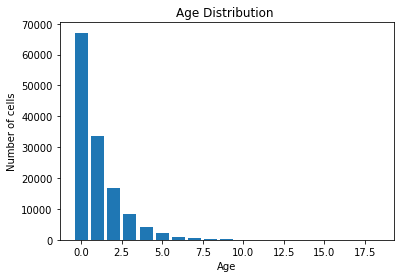

In [18]:
fig, ax = plt.subplots()
ax.set_ylabel('Number of cells')
ax.set_xlabel('Age')
ax.set_title('Age Distribution ')
plt.bar(edad, inicial1)
plt.show()

In [19]:
#probability 
P_1=[]  
for ii in inicial1:
  p_1=ii/total_celulas_1  
  P_1.append(p_1)
print(P_1)

[0.49999627268999963, 0.24999813634499982, 0.12499906817249991, 0.062499534086249954, 0.031249767043124977, 0.015624883521562489, 0.007812441760781244, 0.003906220880390622, 0.001953110440195311, 0.0009765552200976555, 0.00048455030004845504, 0.00020872936002087292, 0.00012672854001267287, 6.709158000670916e-05, 5.218234000521823e-05, 7.454620000745462e-06, 1.4909240001490924e-05, 7.454620000745462e-06, 7.454620000745462e-06]


In [20]:
#second sample, the number is the number of cells that was studied 
n_cell=180
sample_1= random.choices(edad,weights=P_1,k=n_cell) 
print(sample_1)

[0, 1, 1, 0, 0, 5, 0, 1, 1, 5, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 3, 0, 0, 2, 2, 0, 0, 2, 0, 0, 7, 0, 1, 0, 4, 2, 1, 0, 2, 1, 1, 0, 0, 1, 0, 4, 0, 1, 0, 1, 0, 0, 0, 2, 2, 4, 0, 0, 0, 1, 2, 1, 2, 2, 0, 0, 2, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 1, 3, 1, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2, 6, 0, 1, 1, 1, 2, 0, 3, 0, 0, 0, 0, 0, 3, 0, 4, 0, 1, 3, 0, 0, 1, 2, 0, 0, 1, 4, 0, 2, 6, 1, 0, 0, 0, 1, 0, 1, 0, 0, 3, 4, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 1, 2, 1, 2, 2, 0, 1, 4, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 2, 2, 2]


In [21]:
Dic_1= coll.Counter(sample_1)
valores_1=Dic_1.values()
llaves_1=Dic_1.keys()
Ncell_1=[]
Edad_1=[]
for i in valores_1:
  Ncell_1.append(i)
print('Number of cells',Ncell_1)
for j in llaves_1:
  Edad_1.append(j)
print('Ages',Edad_1)
print(sum(Ncell_1))

Number of cells [86, 47, 2, 6, 28, 1, 8, 2]
Ages [0, 1, 5, 3, 2, 7, 4, 6]
180


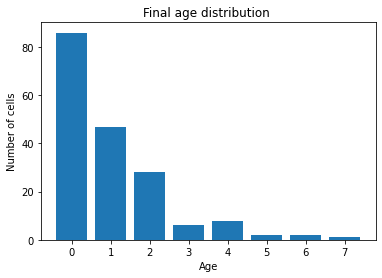

In [22]:
fig, ax = plt.subplots() # coloca los letreros  
ax.set_ylabel('Number of cells')
ax.set_xlabel('Age')
ax.set_title('Final age distribution ')
plt.bar(Edad_1, Ncell_1)
plt.show()



---



---



In [23]:
#Percentage of ages within the distribution 
per_cell=[]
for i in range(len(Edad_1)):
  per_c=(Ncell_1[i]*100)/180
  per_cell.append(per_c)
print(per_cell)
print(Edad_1)

[47.77777777777778, 26.11111111111111, 1.1111111111111112, 3.3333333333333335, 15.555555555555555, 0.5555555555555556, 4.444444444444445, 1.1111111111111112]
[0, 1, 5, 3, 2, 7, 4, 6]




---



---



# Data 

In [24]:
x=[0,11,12,13,14,15,16,17,18,19,21,25,26,27,28,35] # units are in hours
y=[1,1,1,1,1,0.96,0.79,0.58,0.51,0.40,0.34,0,0,0,0,0]# units are in OD

popt [10.01643518 -0.54299728] pcov [[ 1.54072518 -0.08542983]
 [-0.08542983  0.00478655]]


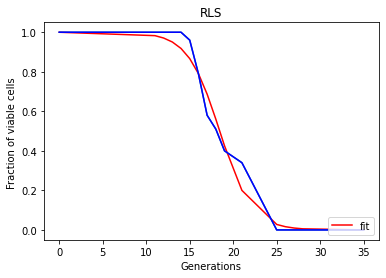

In [25]:
#fit 
xa=np.array(x)
ya=np.array(y)
def fsigmoid(x,a,b):
  return np.exp(a+b*x)/( 1+ np.exp(a+b*x))
xdata = np.linspace(0, 35, 35)
ydata = np.random.normal(size=len(xdata))
popt, pcov = curve_fit(fsigmoid, xa, ya)
a=curve_fit(fsigmoid,xa,ya)
print('popt',popt,'pcov', pcov)
plt.figure()
plt.plot(xa, fsigmoid(xa, *popt), 'r-', label='fit')
plt.plot(x,y)
plt.title('RLS')
plt.ylabel('Fraction of viable cells ')
plt.xlabel('Generations')
plt.legend(loc=4)
plt.plot(xa, ya, 'b-', label='data')
plt.show()



---



# RLS simulation 


In [26]:
R=[] 
for i in range(n_cell):
  r=random.random()
  R.append(r)
print(R)
print(len(R))

[0.3057055487733138, 0.7243352664082897, 0.2402847060721489, 0.550324288461733, 0.4317876085528878, 0.5003597112344285, 0.23165341269094364, 0.10588218937176841, 0.3115761587701481, 0.9613628523978152, 0.9989619626810107, 0.8783777380669577, 0.13938147649999466, 0.45891795782496847, 0.7254379134519813, 0.4923516233367278, 0.06497899353939174, 0.6299288867161749, 0.9885544164370437, 0.4586064997897301, 0.9139531359117847, 0.3487156796479388, 0.2363637430169787, 0.2733982042591889, 0.2775141516706906, 0.8800521723544986, 0.5474586156461739, 0.5175613624718284, 0.5174190904186904, 0.9739747471764997, 0.8104480933314885, 0.3923663847898736, 0.49637359630532074, 0.9732884589176034, 0.8156182705870021, 0.47413356939092144, 0.6009377136822389, 0.46023819491195794, 0.5146000113238725, 0.36925485100556776, 0.530101029636276, 0.07643255122772186, 0.49287204535779705, 0.49356521587310853, 0.6365606389833283, 0.7340169157950636, 0.5946172621645025, 0.14402706354080563, 0.21304510133880683, 0.07775

Equation used for simulation
$$f(x)=\frac{ln\left ( \frac{1-x}{x} \right )-a}{b}$$

In [27]:
p=[]
def inversa(x,a,b):
  return (np.log((1-x)/x)-a)/b
for i in R:
  p1= inversa(i,popt[0],popt[1])
  p.append(p1)
print(p)

[16.93592525702995, 20.22570734692431, 16.326630344874058, 18.81854021817761, 17.940925340067583, 18.449215732076414, 16.238454362725598, 14.517429330209486, 16.986593787269314, 24.365817860124867, 31.097430240557614, 22.087756684887633, 15.09399530089966, 18.143250465374035, 20.235889918681192, 18.390219602003416, 13.53585082165937, 19.426150461566614, 26.65772991711852, 18.140940390022635, 22.798129517793235, 17.296119323872546, 16.28685037485357, 16.64646623427474, 16.684446776609455, 22.116794795235208, 18.797226330658866, 18.575985263424396, 18.57493592958544, 25.117534914291845, 21.122314832527913, 17.641081154139396, 18.419851470409426, 25.068302130432333, 21.184955697273015, 18.25585009161708, 19.20048088152584, 18.153040005032565, 18.554147761065323, 17.4605299701758, 18.66857419633171, 13.857527919118663, 18.39405413847408, 18.399161332768447, 19.478739067239527, 20.316003184390603, 19.15206905290445, 15.164344084925464, 16.040168878843662, 13.891863416490233, 17.509853927155

The next part is for separate the elements into the list *p* taking into a count the age distribution sample. \
As in each run of the code the age distribution change. The number  of lists needed changes varies, so it is posibble that present error when the numer of ages is grater or less that the numbers of lists p_() so, please only coment the line the error occurs and check in the line of print if the number of the sume is n_cell or 180. 

In [29]:
p_1=p[0:Ncell_1[0]]
p_2=p[Ncell_1[0]:Ncell_1[1]+Ncell_1[0]]
p_3=p[Ncell_1[1]+Ncell_1[0]:(Ncell_1[2]+Ncell_1[1]+Ncell_1[0])]
p_4=p[(Ncell_1[2]+Ncell_1[1]+Ncell_1[0]):(Ncell_1[2]+Ncell_1[1]+Ncell_1[3]+Ncell_1[0])]
p_5=p[(Ncell_1[2]+Ncell_1[1]+Ncell_1[3]+Ncell_1[0]):(Ncell_1[2]+Ncell_1[1]+Ncell_1[3]+Ncell_1[4]+Ncell_1[0])]
p_6=p[(Ncell_1[2]+Ncell_1[1]+Ncell_1[3]+Ncell_1[4]+Ncell_1[0]):(Ncell_1[2]+Ncell_1[1]+Ncell_1[3]+Ncell_1[4]+Ncell_1[5]+Ncell_1[0])]
p_7=p[(Ncell_1[2]+Ncell_1[1]+Ncell_1[3]+Ncell_1[4]+Ncell_1[5]+Ncell_1[0]):(Ncell_1[2]+Ncell_1[1]+Ncell_1[3]+Ncell_1[4]+Ncell_1[5]+Ncell_1[6]+Ncell_1[0])]
p_8=p[(Ncell_1[2]+Ncell_1[1]+Ncell_1[3]+Ncell_1[4]+Ncell_1[5]+Ncell_1[6]+Ncell_1[0]):(Ncell_1[2]+Ncell_1[1]+Ncell_1[3]+Ncell_1[4]+Ncell_1[5]+Ncell_1[6]+Ncell_1[0]+Ncell_1[7])]
#p_9=p[(Ncell_1[2]+Ncell_1[1]+Ncell_1[3]+Ncell_1[4]+Ncell_1[5]+Ncell_1[6]+Ncell_1[0]+Ncell_1[7]):(Ncell_1[2]+Ncell_1[1]+Ncell_1[3]+Ncell_1[4]+Ncell_1[5]+Ncell_1[6]+Ncell_1[0]+Ncell_1[7]+Ncell_1[8])]
print(len(p_6)+len(p_5)+len(p_4)+len(p_3)+len(p_2)+len(p_1)+len(p_7)+len(p_8))#+len(p_9))

180


Then we subtract to the numbers given in the list *p*, the number of age in each part. 

In [30]:
dp_1=[]
for i in range(len(p_1)):
  d=p_1[i]-Edad_1[0]
  dp_1.append(d)
print(dp_1)
len(dp_1)

[16.93592525702995, 20.22570734692431, 16.326630344874058, 18.81854021817761, 17.940925340067583, 18.449215732076414, 16.238454362725598, 14.517429330209486, 16.986593787269314, 24.365817860124867, 31.097430240557614, 22.087756684887633, 15.09399530089966, 18.143250465374035, 20.235889918681192, 18.390219602003416, 13.53585082165937, 19.426150461566614, 26.65772991711852, 18.140940390022635, 22.798129517793235, 17.296119323872546, 16.28685037485357, 16.64646623427474, 16.684446776609455, 22.116794795235208, 18.797226330658866, 18.575985263424396, 18.57493592958544, 25.117534914291845, 21.122314832527913, 17.641081154139396, 18.419851470409426, 25.068302130432333, 21.184955697273015, 18.25585009161708, 19.20048088152584, 18.153040005032565, 18.554147761065323, 17.4605299701758, 18.66857419633171, 13.857527919118663, 18.39405413847408, 18.399161332768447, 19.478739067239527, 20.316003184390603, 19.15206905290445, 15.164344084925464, 16.040168878843662, 13.891863416490233, 17.509853927155

86

In [31]:
dp_2=[]
for i in range(len(p_2)):
  d=p_2[i]-Edad_1[1]
  dp_2.append(d)
print(dp_2)
len(dp_2)

[17.28214329492348, 17.029797591293097, 15.004071031199711, 21.15103968975632, 17.875164461144895, 20.215156590739987, 20.280997601519854, 13.052462452963344, 17.344894104520566, 13.238891453766973, 12.847098777541447, 15.676466186511217, 15.658958343560855, 19.84546260231688, 18.83701082799882, 16.54030144500674, 14.937069894434876, 19.98799165157966, 18.503371623525787, 17.554534845623103, 17.647496375647084, 14.578652575120147, 15.68083893857926, 19.385048540323684, 26.53101693518542, 17.823915447529945, 18.86051668808325, 20.008852007093285, 17.111948012304797, 10.498393619884343, 15.57443319458649, 16.54395256172462, 18.50740113388245, 12.165594411894725, 23.189200364853935, 15.398756804543403, 16.81717255262339, 16.838285848097975, 15.652689258212309, 19.278655647573185, 16.021889426947677, 8.635753407154905, 18.55929791942012, 19.34866384855483, 20.055509420315705, 18.58849899990684, 20.234254229259]


47

In [32]:
dp_3=[]
for i in range(len(p_3)):
  d=p_3[i]-Edad_1[2]
  dp_3.append(d)
print(dp_3)
len(dp_3)

[16.421368411891482, 16.01585495164826]


2

In [33]:
dp_4=[]
for i in range(len(p_4)):
  d=p_4[i]-Edad_1[3]
  dp_4.append(d)
#dp_4=[dp_3-Edad[3]]
print(dp_4)
len(dp_4)

[15.90749136988537, 16.691944195033823, 17.1969896718074, 17.89379176128312, 15.936006911422854, 18.521120082801648]


6

In [34]:
dp_5=[]
for i in range(len(p_5)):
  d=p_5[i]-Edad_1[4]
  dp_5.append(d)
print(dp_5)
len(dp_5)

[13.779927471583632, 15.360037492256119, 18.348323427477528, 22.43087099694422, 16.172679826965837, 18.470055235631992, 22.133655437399902, 16.925312698395434, 17.853954032516572, 15.979624423105719, 10.379874162957844, 17.048249364734815, 22.0098865939035, 17.064012107776048, 14.237379929128284, 14.984329825215138, 14.967832111453205, 19.09418318550794, 19.32082722940638, 8.721539900272793, 16.345776546742677, 13.491186951089738, 12.064688160589725, 15.91830963942244, 18.615529417320857, 14.383582949453164, 12.19627674477618, 27.33838146730241]


28

In [35]:
dp_6=[]
for i in range(len(p_6)):
  d=p_6[i]-Edad_1[5]
  dp_6.append(d)
print(dp_6)
len(dp_6)

[9.973933313923908]


1

In [36]:
dp_7=[]
for i in range(len(p_7)):
  d=p_7[i]-Edad_1[6]
  dp_7.append(d)
print(dp_7)
len(dp_7)

[15.15565273886114, 13.484012419975759, 13.654901087538786, 16.007379555883933, 11.08292858412636, 9.803876833791806, 10.590401005878546, 13.985947730353434]


8

In [37]:
dp_8=[]
for i in range(len(p_8)):
  d=p_8[i]-Edad_1[7]
  dp_8.append(d)
print(dp_8)
print(Edad_1[7])
len(dp_8)

[10.554900274585805, 11.225137453053634]
6


2

In [ ]:
dp_9=[]
for i in range(len(p_9)):
  d=p_9[i]-Edad_1[8]
  dp_9.append(d)
print(dp_9)
len(dp_9)

Please if error occurs, it is because you are run the list p_() that is not defined, so, please don´t run that cell of code. \
And please check if the len of the *listaobservada* is 180 or *n_cell* 

In [38]:
listaobservada=dp_1+dp_2+dp_3+dp_4+dp_5+dp_6+dp_7+dp_8#+dp_9
print(listaobservada)
len(listaobservada)

[16.93592525702995, 20.22570734692431, 16.326630344874058, 18.81854021817761, 17.940925340067583, 18.449215732076414, 16.238454362725598, 14.517429330209486, 16.986593787269314, 24.365817860124867, 31.097430240557614, 22.087756684887633, 15.09399530089966, 18.143250465374035, 20.235889918681192, 18.390219602003416, 13.53585082165937, 19.426150461566614, 26.65772991711852, 18.140940390022635, 22.798129517793235, 17.296119323872546, 16.28685037485357, 16.64646623427474, 16.684446776609455, 22.116794795235208, 18.797226330658866, 18.575985263424396, 18.57493592958544, 25.117534914291845, 21.122314832527913, 17.641081154139396, 18.419851470409426, 25.068302130432333, 21.184955697273015, 18.25585009161708, 19.20048088152584, 18.153040005032565, 18.554147761065323, 17.4605299701758, 18.66857419633171, 13.857527919118663, 18.39405413847408, 18.399161332768447, 19.478739067239527, 20.316003184390603, 19.15206905290445, 15.164344084925464, 16.040168878843662, 13.891863416490233, 17.509853927155

180

# RLS simulation withtout the age distribution 

In [39]:
l=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]#List of times to plot 
d=[] # list that stores the values of the fraction viable cell 
for i in x:  
  num=0  
  for j in p:
    if j>i:
      num=num+1
  d.append(num)
print(d)
for i in range(len(d)):
    d[i] /= n_cell
print(d)

[180, 176, 175, 173, 166, 159, 151, 128, 107, 76, 31, 6, 4, 3, 2, 0]
[1.0, 0.9777777777777777, 0.9722222222222222, 0.9611111111111111, 0.9222222222222223, 0.8833333333333333, 0.8388888888888889, 0.7111111111111111, 0.5944444444444444, 0.4222222222222222, 0.17222222222222222, 0.03333333333333333, 0.022222222222222223, 0.016666666666666666, 0.011111111111111112, 0.0]


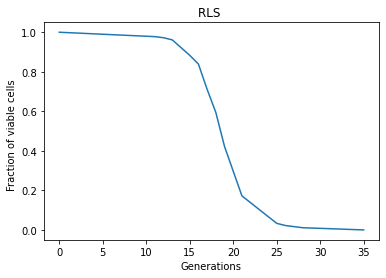

In [40]:
plt.plot(x,d)
plt.xlabel('Generations')
plt.ylabel('Fraction of viable cells  ')
plt.title('RLS ')
plt.show()  

## RLS taking into a count the age distribution 

In [41]:
l=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,29,30]#List of times to plot
viab=[] # list that stores the values of the fraction viable cell
for i in x:
  num=0  
  for j in listaobservada:
    if j>i:
      num=num+1
  viab.append(num)
print(viab)
for i in range(len(viab)):
    viab[i] /= n_cell
print(viab)

[180, 170, 168, 163, 152, 144, 128, 106, 84, 56, 21, 6, 4, 2, 1, 0]
[1.0, 0.9444444444444444, 0.9333333333333333, 0.9055555555555556, 0.8444444444444444, 0.8, 0.7111111111111111, 0.5888888888888889, 0.4666666666666667, 0.3111111111111111, 0.11666666666666667, 0.03333333333333333, 0.022222222222222223, 0.011111111111111112, 0.005555555555555556, 0.0]


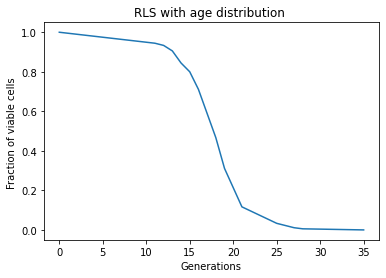

In [42]:
plt.plot(x,viab) 
plt.xlabel('Generations')
plt.ylabel('Fraction of viable cells ')
plt.title('RLS with age distribution ')
plt.show()

Comparison of the simulation of the two RLS curves

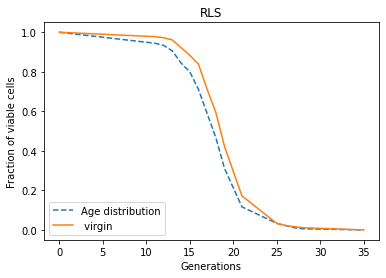

In [43]:
plt.plot(x, viab, '--', label='Age distribution') 
plt.plot(x, d, label=' virgin') 
plt.title('RLS')
plt.ylabel('Fraction of viable cells')
plt.xlabel('Generations')
plt.legend(loc=3)
plt.show()

## Comparison with the data

RLS without the age distribution(virgin cells) 

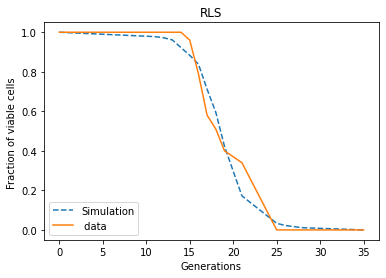

In [44]:
plt.plot(x, d, '--', label='Simulation') 
plt.plot(x, y, label=' data ')
plt.title('RLS')
plt.ylabel('Fraction of viable cells ')
plt.xlabel('Generations')
plt.legend(loc=3)
plt.show()

Least Squares

In [45]:
error=[]
for i in range(len(xa)):
  r_1=ya[i]
  r_t=(r_1-d[i])**2
  error.append(r_t)
print(error)
print(sum(error))

[0.0, 0.0004938271604938286, 0.0007716049382716057, 0.0015123456790123435, 0.006049382716049374, 0.005877777777777777, 0.002390123456790122, 0.017190123456790142, 0.007130864197530862, 0.0004938271604938261, 0.02814938271604939, 0.0011111111111111111, 0.0004938271604938272, 0.0002777777777777778, 0.0001234567901234568, 0.0]
0.07206543209876545


RLS with the age distribution 

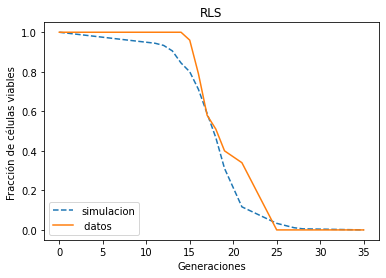

In [49]:
plt.plot(x, viab, '--', label='simulacion')
plt.plot(x, y, label=' datos ')
plt.title('RLS')
plt.ylabel('Fracción de células viables ')
plt.xlabel('Generaciones')
plt.legend(loc=3)
plt.show()

Least Squares

In [48]:
error=[]
for i in range(len(xa)):
  r_t=(ya[i]-viab[i])**2
  error.append(r_t)
print(error)
print(sum(error))

[0.0, 0.0030864197530864226, 0.004444444444444443, 0.008919753086419752, 0.02419753086419753, 0.025599999999999973, 0.0062234567901234585, 7.901234567901336e-05, 0.001877777777777778, 0.007901234567901238, 0.049877777777777785, 0.0011111111111111111, 0.0004938271604938272, 0.0001234567901234568, 3.08641975308642e-05, 0.0]
0.13396666666666665
